# PROBLEM STATEMENT
## This is a programming assignment in which we build a multiple linear regression model to predict the demand for shared bikes. 

### PROBLEM:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock in the same system.

A US bike-sharing provider, BoomBikes, has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company finds it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
•	Which variables are significant in predicting the demand for shared bikes?
•	How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Importing Required Libraries 

In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [569]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [570]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [571]:
import warnings
warnings.filterwarnings("ignore")

## Data understanding, preparation and EDA

### Importing the loan dataset and displaying the first five rows.
#### Importing with low_memory = False as we suspect that the automatic data type inference may not be correct

In [574]:
day = pd.read_csv("day.csv")
day = day.replace(r'^\s*$', np.nan, regex=True) ## csv file may have blank values and pandas may not import these values as NaN.

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Understanding DataFrame and structure of the data set

In [576]:
# Shape of the dataset (rows, columns)
day.shape

(730, 16)

In [577]:
# Mathematical stats for numerical variables
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [578]:
# Dataset info
day.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### <font color = 'Magenta'> We see that no columns has Null values as 730 non-null matches with number of rows = 730.

In [580]:
#Formatting the dates in column 'dteday' to single same format
day['dteday'] = day['dteday'].apply(lambda x: datetime.strptime(x, "%d-%m-%Y"))

In [581]:
# Converting the 'dteday' column in pandas datetime format and creating a new column 'date'.
# Also then dropping the 'dteday' column as it is replicated in the 'date' column 

day['date'] = pd.to_datetime(day['dteday'])
day = day.drop('dteday', axis = 1)
day.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018-01-01
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018-01-02
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018-01-03
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018-01-04
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018-01-05


In [582]:
# Dropping column 'holiday' since if it is a 'working day', then it is not a holiday

day = day.drop('holiday', axis =1)

#### Renaming columns to have meanings

In [584]:
day = day.rename(columns = {'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_type', 'hum': 'humidity', 
                  'cnt': 'total_rentals', 'atemp': 'perceived_temp'})
day.head()

,instant,season,year,month,weekday,workingday,weather_type,temp,perceived_temp,humidity,windspeed,casual,registered,total_rentals,date
0,1,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018-01-01
1,2,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018-01-02
2,3,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018-01-03
3,4,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018-01-04
4,5,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018-01-05


### Checking distribution of our target variable 'total_rentals'

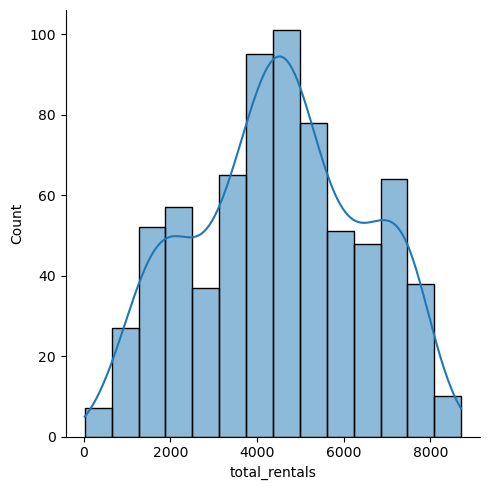

In [586]:
sns.displot(day['total_rentals'], kde = True)
plt.show()

#### <font color = 'Magenta'> Gaussian distribution (not perfect), with mean centered around 5000 rentals

##### Scientific fact: Temperature and humidity have an inverse relationship, meaning that as the temperature increases, the relative humidity decreases.
So, dropping the column 'humidity' since as 'temp' is high, 'humidity' will be low and when 'temp' is low, 'humidity' will be high.

In [589]:
day = day.drop('humidity', axis = 1)

### Mapping the values of variables 'season', 'weather_type', 'weekday' and 'month' as :

#### Season:
-  1: spring
-  2: summer
-  3: fall
-  4: winter

#### Weather_type:
- 1: Clear or Few clouds
- 2: Mist and Few Clouds
- 3: Light Snow and Light Rain
- 4: Heavy Rain + Heavy Snow

#### Weekday:
- 0: Sunday
- 1: Monday
- 2: Tuesday
- 3: Wednesday
- 4: Thursday
- 5: Friday
- 6: Saturday

#### Month:
- 1 to 12 respectively as ( Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)

In [591]:
# Mapping season
day['season'] = day['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Mapping Weather_type
day['weather_type'] = day['weather_type'].map({1: 'Clear or Few clouds', 2: 'Mist and Few Clouds',  
                                                     3: 'Light Snow and Light Rain', 4: 'Heavy Rain + Heavy Snow'})

# Mapping Weeday
day['weekday'] = day['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                     4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Mapping Month
day['month'] = day['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                                 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [592]:
# Checking for 'season' values
day['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [593]:
# Checking for 'weather_type' values
day['weather_type'].value_counts()

weather_type
Clear or Few clouds          463
Mist and Few Clouds          246
Light Snow and Light Rain     21
Name: count, dtype: int64

### Before proceeding further we would drop some redundant or irrelevant columns:

#### Drop Instant
- Variable 'instant' is the same as the index. 

In [595]:
# Dropping 'instant'
day = day.drop('instant', axis = 1)
day.head()

,season,year,month,weekday,workingday,weather_type,temp,perceived_temp,windspeed,casual,registered,total_rentals,date
0,spring,0,Jan,Saturday,0,Mist and Few Clouds,14.110847,18.18125,10.749882,331,654,985,2018-01-01
1,spring,0,Jan,Sunday,0,Mist and Few Clouds,14.902598,17.68695,16.652113,131,670,801,2018-01-02
2,spring,0,Jan,Monday,1,Clear or Few clouds,8.050924,9.47025,16.636703,120,1229,1349,2018-01-03
3,spring,0,Jan,Tuesday,1,Clear or Few clouds,8.200000,10.60610,10.739832,108,1454,1562,2018-01-04
4,spring,0,Jan,Wednesday,1,Clear or Few clouds,9.305237,11.46350,12.522300,82,1518,1600,2018-01-05


### Visualising effects of independent variables on our target variable 'total_rentals' (originally 'cnt')
- Numerical variables analysis will be done before building our model after doing some data engineering
- We would analyze categorical variables in depth here

### Categorical Varaible Anylysis

#### 1- Analysing the growth/dip in year-wise rentals (Numerical Variable)

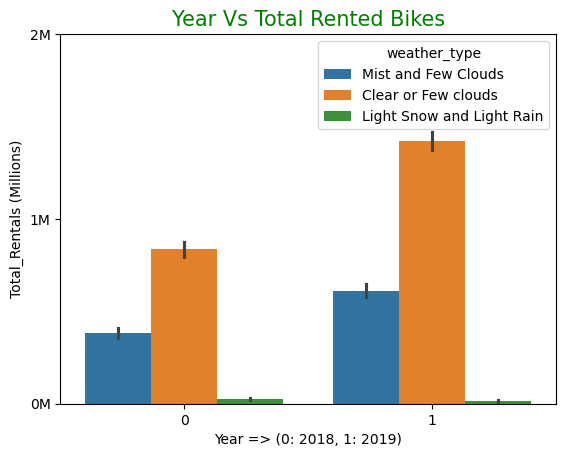

In [599]:
# Year Vs total_rental_count (target variable)
sns.barplot(data = day, x = 'year', y = 'total_rentals', estimator="sum", hue = 'weather_type')
plt.title("Year Vs Total Rented Bikes", color = 'green', fontsize = 15)
plt.xlabel("Year => (0: 2018, 1: 2019)")
plt.ylabel("Total_Rentals (Millions)")
ticks = np.arange(0, 3000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()  

In [600]:
rent_count_year = day.groupby(by = 'year')[['casual', 'registered', 'total_rentals']].sum()
rcy = rent_count_year.reset_index()  #rcy = rent_count_year
rcy

,year,casual,registered,total_rentals
0,0,247252,995851,1243103
1,1,372700,1675042,2047742


##### <font color = 'Magenta'> We see almost 65% growth from the year 2018 to the year 2019. This business concept was gaining popularity
- Also growth is seen in both casual and registered rentals and hence in Total count.
- Rental count is most when there is no rain or snow

#### 2- Analysing the Season wise growth/dip in rentals

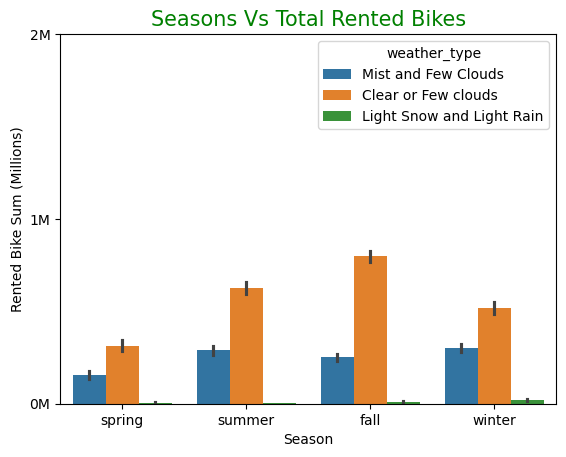

In [603]:
# Season Vs cnt (target variable)
sns.barplot(data = day, x = 'season', y = 'total_rentals', estimator="sum", hue = 'weather_type')
plt.title("Seasons Vs Total Rented Bikes", color = 'green', fontsize = 15)
plt.xlabel("Season")
plt.ylabel("Rented Bike Sum (Millions)")
ticks = np.arange(0, 3000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()  

In [604]:
rent_count_season = day.groupby(by = 'season')[['casual', 'registered', 'total_rentals']].sum()
rcs = rent_count_season.reset_index()  #rcy = rent_count_season
rcs

,season,casual,registered,total_rentals
0,fall,226091,835038,1061129
1,spring,60557,408957,469514
2,summer,203522,715067,918589
3,winter,129782,711831,841613


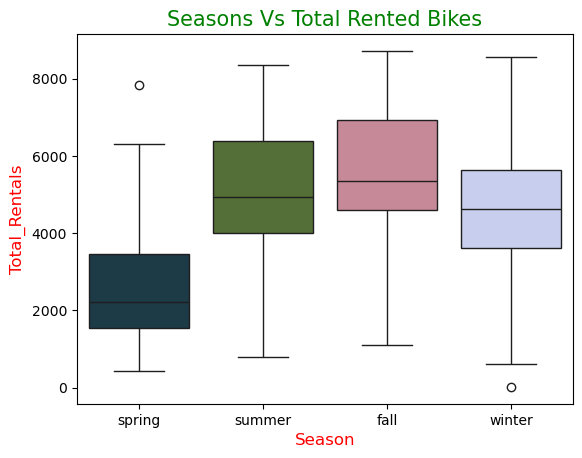

In [605]:
sns.boxplot(data = day, x = 'season', y = 'total_rentals', palette = ('cubehelix'))
plt.title("Seasons Vs Total Rented Bikes", color = 'green', fontsize = 15)
plt.xlabel("Season", color = 'red', fontsize = 12)
plt.ylabel("Total_Rentals", color = 'red', fontsize = 12)
plt.show()  

##### <font color = 'Magenta'> Demands for Bike is highest in Fall and lowest in Spring (due to associated rainfalls and snow both)
- From the above two studies (year vs total_rentals and season vs total_rentals, we took weather_type as hue), it is evident that the rental count is less when there is rain and snow.
- rental count is high when there is clear or few clouds

#### 3- Working day Vs Rental counts
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0

In [608]:
rental_workingday = day.groupby(by = 'workingday')[['casual', 'registered', 'total_rentals']].sum()
rwd = rental_workingday.reset_index()
rwd

,workingday,casual,registered,total_rentals
0,0,316732,683537,1000269
1,1,303220,1987356,2290576


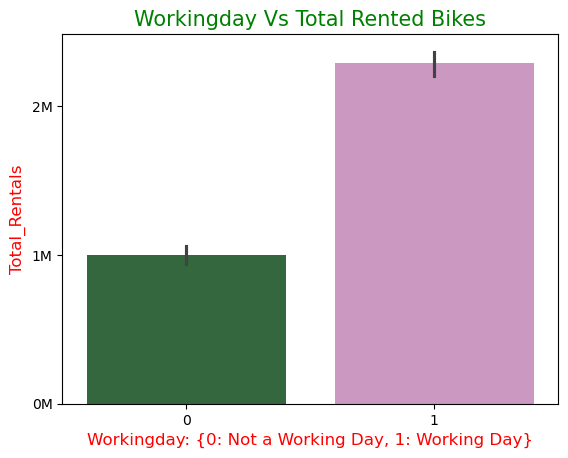

In [609]:
sns.barplot(x = 'workingday', y = 'total_rentals', data = day, palette = ('cubehelix'), estimator = 'sum')
plt.title("Workingday Vs Total Rented Bikes", color = 'green', fontsize = 15)
plt.xlabel("Workingday: {0: Not a Working Day, 1: Working Day}", color = 'red', fontsize = 12)
plt.ylabel("Total_Rentals", color = 'red', fontsize = 12)
ticks = np.arange(0, 3000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

##### <font color = 'Magenta'> It is clear that rental counts:
- Are high on working days when compared to non-working days for registered users
- Are almost the same for working days and  non-working days for casual users
- Total is high on working days when compared to non-working days due to registered users
- #### Essentially, whether rentals are registered or casual is decided once Bikes are rented. Hence these are the same as 'target_variable'. Hence we would drop both 'registered' and 'casual' later.

#### 4- Month vs. Rental_counts

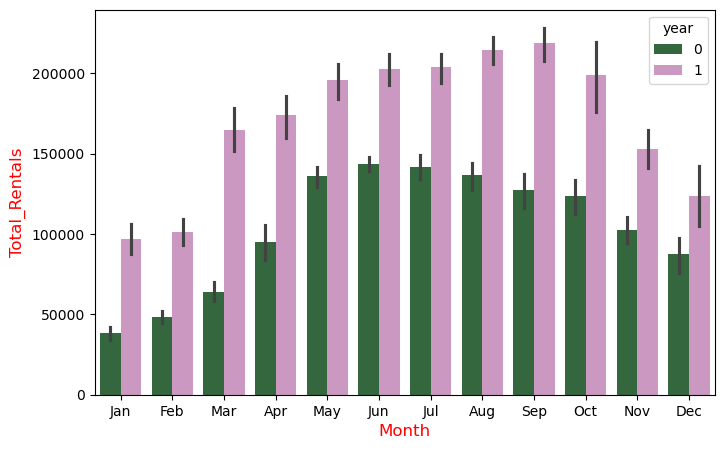

In [612]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'month', y = 'total_rentals', hue='year', estimator = 'sum', data = day, palette= ('cubehelix'))
plt.xlabel("Month", color = 'red', fontsize = 12)
plt.ylabel("Total_Rentals", color = 'red', fontsize = 12)
plt.show()

#### <font color = 'Magenta'> Total Rentals are:
- More in the year 2019 (1) than in the year 2018 (2) for each month of the year
- Greater in Aug and Sep, irrespective of the year.

#### 5- Weekday vs. Rental_counts

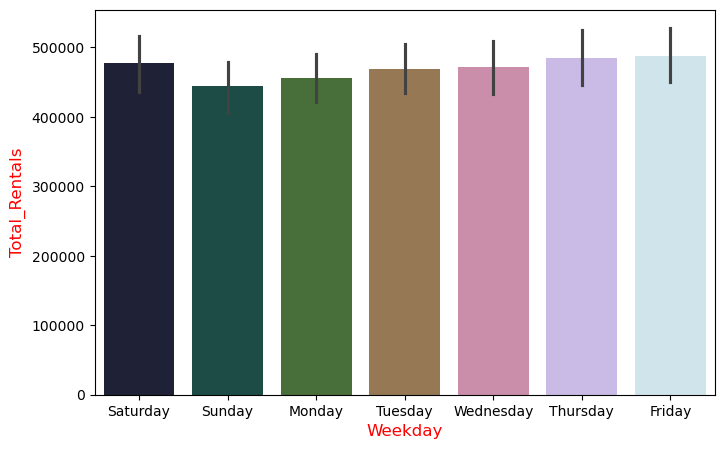

In [615]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'weekday', y = 'total_rentals', estimator = 'sum', data = day, palette= ('cubehelix'))
plt.xlabel("Weekday", color = 'red', fontsize = 12)
plt.ylabel("Total_Rentals", color = 'red', fontsize = 12)
plt.show()

In [616]:
rental_weekday = day.groupby(by = 'weekday')[['casual', 'registered', 'total_rentals']].sum()
rweekd = rental_weekday.reset_index()
rweekd

,weekday,casual,registered,total_rentals
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57254,413960,471214


#### <font color = 'Magenta'>Summary of 'Weekdays vs. Total Rental':
- Total Rentals have an almost similar count on all 7 days of the week
- On weekends (Saturday and Sunday), Casual count is more than that on weekdays
- On weekends (Saturday and Sunday), the Registered count is less than that on weekdays

#### Weather_type vs. Total Rentals

In [619]:
rental_weather = day.groupby(by = 'weather_type')[['casual', 'registered', 'total_rentals']].sum()
rweather = rental_weather.reset_index()
rweather

,weather_type,casual,registered,total_rentals
0,Clear or Few clouds,446346,1811606,2257952
1,Light Snow and Light Rain,3895,33974,37869
2,Mist and Few Clouds,169711,825313,995024


#### <font color = "Magenta"> Rentals are higher when the cloud cover is nill or less. Rentals are least when there is rain on snow

### Creating Dummy Variables to represent different categorical variables as 0 and 1 so that could be included in our linear regression model if needed. 
- We will also reduce the extra column created during dummy variable creation using drop_first = True
- 'K' instances can be represented by 'K-1' instances

#### Dummies for 'season'
- 000 = Fall
- 100 = Spring
- 010 = Summer
- 001 = Winter

In [623]:
season_dummies = pd.get_dummies(day['season'], drop_first = True)

## get_dummies provides 'True and False' but, We need 0 and 1 so mapping True as 1 and False as 0
season_dummies = season_dummies.apply(lambda x: x.map({True:1, False:0}))

season_dummies

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


#### Dummies for 'weather_type'
- 00 = Clear or Few Clouds
- 10 = Light Snow and Light Rain
- 01 = Mist and Few Clouds

In [625]:
weather_dummies = pd.get_dummies(day['weather_type'], drop_first = True)

## get_dummies provides 'True and False' but, We need 0 and 1 so mapping True as 1 and False as 0
weather_dummies = weather_dummies.apply(lambda x: x.map({True:1, False:0}))

weather_dummies

,Light Snow and Light Rain,Mist and Few Clouds
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


#### Dummies for 'weekday'
- 001000: Sunday
- 100000: Monday
- 000010: Tuesday
- 000001: Wednesday
- 000100: Thursday
- 000000: Friday
- 010000: Saturday

In [627]:
weekday_dummies = pd.get_dummies(day['weekday'], drop_first = True)

## get_dummies provides 'True and False' but, We need 0 and 1 so mapping True as 1 and False as 0
weekday_dummies = weekday_dummies.apply(lambda x: x.map({True:1, False:0}))

weekday_dummies

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


#### Dummies for 'month'
- 00000000000: Apr
- 10000000000: Aug
- 01000000000: Dec
- 00100000000: Feb
- 00010000000: Jan
- 00001000000: Jul
- 00000100000: Jun
- 00000010000: Mar
- 00000001000: May
- 00000000100: Nov
- 00000000010: Oct
- 00000000001: Sep

In [629]:
month_dummies = pd.get_dummies(day['month'], drop_first = True)

## get_dummies provides 'True and False' but, We need 0 and 1 so mapping True as 1 and False as 0
month_dummies = month_dummies.apply(lambda x: x.map({True:1, False:0}))

month_dummies

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


### Concatenating DataFrames 'day', 'season_dummies', 'weather_dummies', 'weekday_dummies' and 'month_dummies'
- Final DataFrame has the name 'day'
- We will drop columns 'season', 'weather_type', 'weekday' and 'month' as they are now redundant.

In [631]:
# Concating DataFrames
day = pd.concat([day, season_dummies, weather_dummies, weekday_dummies, month_dummies], axis =1 )

In [632]:
#Dropping the variables
day = day.drop(['season', 'weather_type', 'weekday', 'month'], axis = 1)
day.head()

,year,workingday,temp,perceived_temp,windspeed,casual,registered,total_rentals,date,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,14.110847,18.18125,10.749882,331,654,985,2018-01-01,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,17.68695,16.652113,131,670,801,2018-01-02,1,...,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,16.636703,120,1229,1349,2018-01-03,1,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,10.739832,108,1454,1562,2018-01-04,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,12.522300,82,1518,1600,2018-01-05,1,...,0,0,1,0,0,0,0,0,0,0


### Analysing Numerical Variables

In [634]:
num_vars = ['perceived_temp', 'temp', 'windspeed', 'casual', 'registered', 'total_rentals']

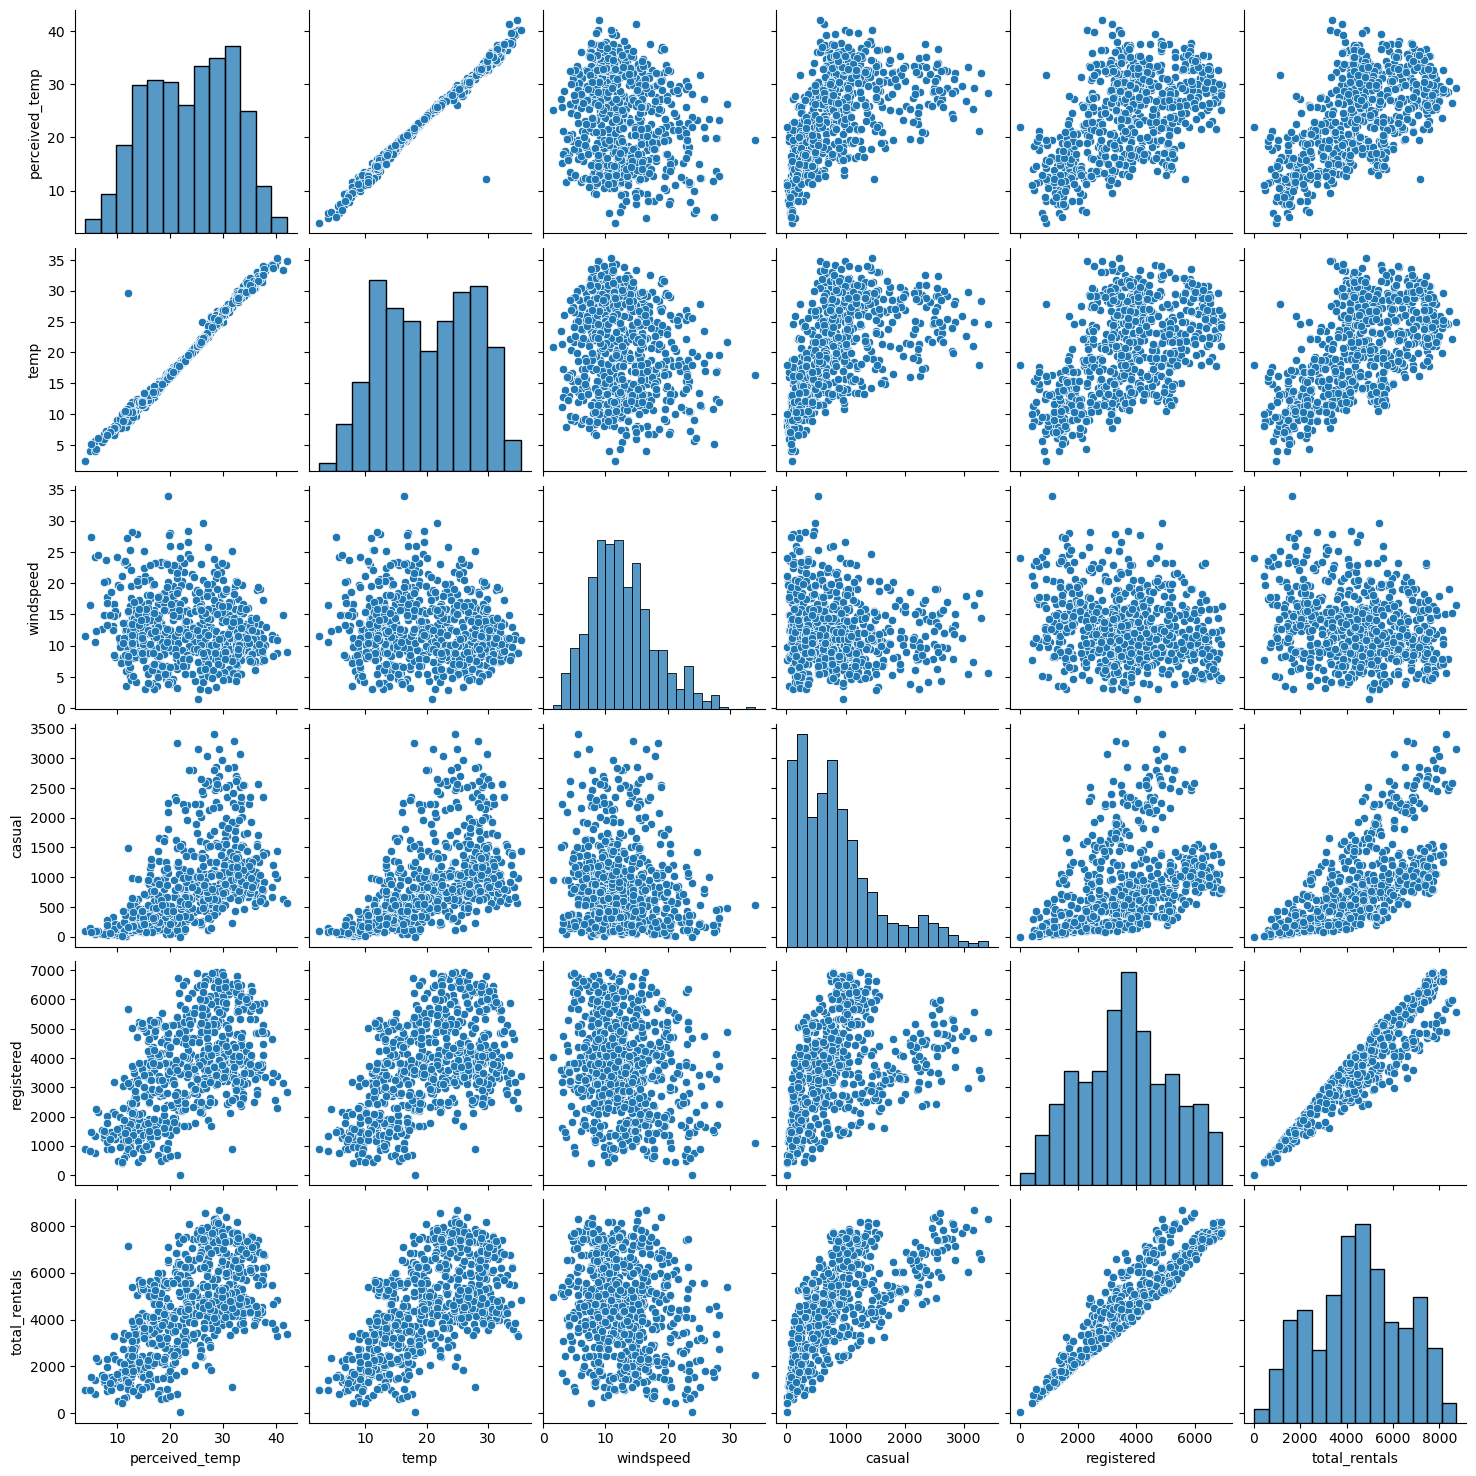

In [635]:
sns.pairplot(day[num_vars])
plt.show()

In [636]:
numerical_variables_correlation = day[num_vars].corr()
numerical_variables_correlation

,perceived_temp,temp,windspeed,casual,registered,total_rentals
perceived_temp,1.000000,0.991696,-0.183876,0.543362,0.543678,0.630685
temp,0.991696,1.000000,-0.158186,0.542731,0.539436,0.627044
windspeed,-0.183876,-0.158186,1.000000,-0.167995,-0.217914,-0.235132
casual,0.543362,0.542731,-0.167995,1.000000,0.394137,0.672123
registered,0.543678,0.539436,-0.217914,0.394137,1.000000,0.945411
total_rentals,0.630685,0.627044,-0.235132,0.672123,0.945411,1.000000


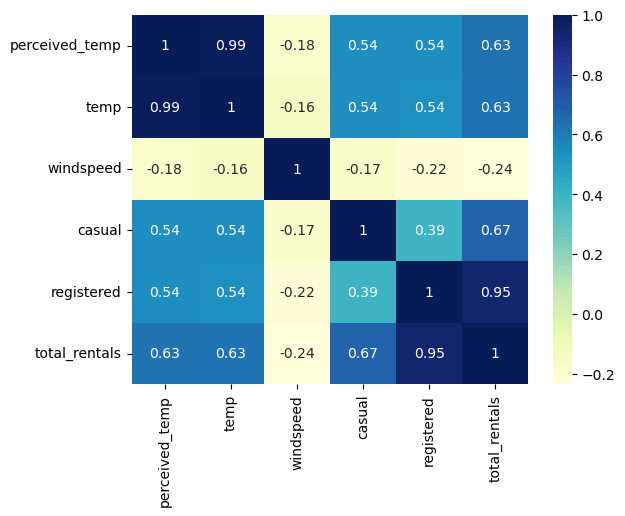

In [637]:
sns.heatmap(numerical_variables_correlation, annot = True, cmap = "YlGnBu")
plt.show()

#### <font color = "Magenta"> Windespeed has negative correlation with total_rentals meaning as Wind is high, rentals are low. Rest numerical variables have a positive correlation.
- The explanatory variables have some time of correlation with the study variable ('total_rentals')
#### <font color = 'Red'> One of the assumptions of Linear Regression is that there should be linear relations between the independent and the dependent variable: 
- Pairplot indicates some linear relations between the independent and the dependent variable.

In [639]:
#Dropping 'registered' and 'casual'
day = day.drop(['registered', 'casual'], axis = 1)

## Linear Regression Model Building

In [641]:
# Dropping the column 'date'
day = day.drop('date', axis =1 )
day.head()

,year,workingday,temp,perceived_temp,windspeed,total_rentals,spring,summer,winter,Light Snow and Light Rain,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,14.110847,18.18125,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,17.68695,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,10.739832,1562,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,12.522300,1600,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Splitting our 'day' DataFrame in 'train' and 'test' set in 75:25 ratio

In [643]:
df_train, df_test = train_test_split(day, train_size = 0.75, test_size = 0.25, random_state = 42)

In [644]:
df_train.head()

,year,workingday,temp,perceived_temp,windspeed,total_rentals,spring,summer,winter,Light Snow and Light Rain,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,1,19.201653,23.0423,12.208807,7534,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
668,1,1,14.657500,18.0550,11.166689,5566,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
694,1,1,12.846653,16.9502,3.125550,5087,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
212,0,1,31.638347,35.1646,10.500039,4266,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,1,11.979134,14.9211,13.957239,1650,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [645]:
df_test.head()

,year,workingday,temp,perceived_temp,windspeed,total_rentals,spring,summer,winter,Light Snow and Light Rain,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
468,1,0,20.295000,24.39980,12.791439,7460,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,27.367500,30.77750,14.333846,4788,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
302,0,0,13.085847,16.06645,11.833339,3331,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
355,0,1,17.356653,21.30605,3.167425,3068,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
515,1,1,27.880000,31.56645,13.083693,7338,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Working 1st on Train set to train our model. Let's analyse basic properties of train set

In [647]:
df_train.shape

(547, 28)

#### Normalise/Scale the numeric columns of the train set so that each column has same range of values/ dimensions

In [649]:
# creating an instance of class MinMaxScaler
scaler = MinMaxScaler()

In [650]:
numeric_vars = ['perceived_temp', 'temp', 'windspeed', 'total_rentals']

In [651]:
#scaler.fit_transform would scale the values between 0 & 1 using MinMaxScaling
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

#To check if values are in the range [0,1]
df_train.head()

,year,workingday,temp,perceived_temp,windspeed,total_rentals,spring,summer,winter,Light Snow and Light Rain,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,1,0.509887,0.501133,0.400324,0.857540,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
668,1,1,0.371783,0.370203,0.361366,0.619944,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
694,1,1,0.316749,0.341199,0.060760,0.562115,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
212,0,1,0.887856,0.819376,0.336444,0.462996,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,1,0.290384,0.287930,0.465686,0.147169,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [652]:
# Creating X and Y for the model
y_train = df_train.pop('total_rentals') # This will pop out 'total_rentals' column from df_train and store in y_train
X_train = df_train # Rest of (without 'total_rentals' is X_train)

In [653]:
X_train.head()

,year,workingday,temp,perceived_temp,windspeed,spring,summer,winter,Light Snow and Light Rain,Mist and Few Clouds,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,1,0.509887,0.501133,0.400324,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
668,1,1,0.371783,0.370203,0.361366,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
694,1,1,0.316749,0.341199,0.060760,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,1,0.887856,0.819376,0.336444,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,1,0.290384,0.287930,0.465686,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [654]:
y_train

653    0.857540
668    0.619944
694    0.562115
212    0.462996
18     0.147169
         ...   
71     0.239768
106    0.399976
270    0.419655
435    0.587589
102    0.208982
Name: total_rentals, Length: 547, dtype: float64

### Build model using RFE (Recursive Feature Elimination)

- In order to enhance model performance, this machine learning technique finds and eliminates features from a dataset that aren't important.#### Working Principle:
- RFE iteratively eliminates the least significant features by ranking them until the required (input) number of features is obtained.s.

In [656]:
# Creating instance for LinearRegression

lm = LinearRegression()

In [657]:
lm.fit(X_train, y_train)

# 15 = number of variables we want. RFE will choose the top 15 variables. It is our choice based on our understanding of data.
rfe = RFE(estimator=lm, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

In [658]:
#List of variables selected with their ranks
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('year', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('perceived_temp', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('Light Snow and Light Rain', True, 1),
 ('Mist and Few Clouds', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 2),
 ('Thursday', False, 11),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 12),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 5),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1)]

##### <font color = 'Red'> True implies RFE says these are the top 15 variables and have rank 1.
The next best has rank 2, next rank 3, and so on. We will go with RFE-supported best 15

In [660]:
col = X_train.columns[rfe.support_]  ##Picking these columns

In [661]:
col_discard = X_train.columns[~rfe.support_]  ## discarding these columns

In [662]:
col_discard   #discarded columns

Index(['summer', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug',
       'Feb', 'Jan', 'Jun', 'May', 'Oct'],
      dtype='object')

In [663]:
X_train_rfe1  = X_train[col]  ## X data with columns selected as True by RFE

In [664]:
X_train_rfe1.head()

,year,workingday,temp,perceived_temp,windspeed,spring,winter,Light Snow and Light Rain,Mist and Few Clouds,Saturday,Dec,Jul,Mar,Nov,Sep
653,1,1,0.509887,0.501133,0.400324,0,1,0,0,0,0,0,0,0,0
668,1,1,0.371783,0.370203,0.361366,0,1,0,1,0,0,0,0,0,0
694,1,1,0.316749,0.341199,0.060760,0,1,0,0,0,0,0,0,1,0
212,0,1,0.887856,0.819376,0.336444,0,0,0,0,0,0,0,0,0,0
18,0,1,0.290384,0.287930,0.465686,1,0,0,1,0,0,0,0,0,0


#### Now using statsmodel for summary

In [666]:
#Creating model#1
X_train_rfe1_sm = sm.add_constant(X_train_rfe1)
lr1 = sm.OLS(y_train, X_train_rfe1_sm)
lr1_model = lr1.fit()
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_rentals   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.9
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          4.91e-200
Time:                        02:42:46   Log-Likelihood:                 519.21
No. Observations:                 547   AIC:                            -1006.
Df Residuals:                     531   BIC:                            -937.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1976      0.029      6.875      0.000       0.141       0.254
year                          0.2459      0.008     30.011      0.000       0.230       0.262
workingday                    0.0497      0.011      4.581      0.000       0.028       0.071
temp                          0.1799      0.236      0.762      0.446      -0.284       0.644
perceived_temp                0.2471      0.252      0.982      0.327      -0.247       0.741
windspeed                    -0.0858      0.024     -3.562      0.000      -0.133      -0.038
spring                       -0.1589      0.016     -9.715      0.000      -0.191      -0.127
winter                        0.0832      0.014      5.953      0.000       0.056       0.111
Light Snow and Light Rain    -0.2739      0.024    -11.227      0.000      -0.322      -0.226
Mist and Few Clouds          -0.0842      0.009     -9.576      0.000      -0.101      -0.067
Saturday                      0.0572      0.014      3.959      0.000       0.029       0.086
Dec                          -0.0727      0.018     -4.134      0.000      -0.107      -0.038
Jul                          -0.0519      0.016     -3.171      0.002      -0.084      -0.020
Mar                           0.0495      0.018      2.829      0.005       0.015       0.084
Nov                          -0.0859      0.018     -4.703      0.000      -0.122      -0.050
Sep                           0.0530      0.015      3.465      0.001       0.023       0.083
==============================================================================
Omnibus:                       78.774   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.872
Skew:                          -0.779   Prob(JB):                     6.45e-39
Kurtosis:                       5.299   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### We see that values for $R^2$ and adj $R^2$ values are good and above 80%.
- Our explanatory variables are significant (low p-values) except for 'temp' and 'perceived_temp'. We may need to drop any of them.
- F-values are also good indicating that our model is a good fit for the data provided
##### We will first check for VIF (Variance Inflation Factor) and then decide about which variables to drop

### VIF (Variance Inflation Factor)
- VIF gives a basic quantitative idea about how much the feature variables correlate. It is a crucial parameter to test the linear model.
- The formula for calculating VIF is:
- $VIF_{i} = {1}/{(1 - {R_{i}}^2})$
- #### <font color = 'Blue'> VIF is a check for Multicollinearity. We can get rid of Multicollinearity by dropping a few variables (one by one)
- <font color = 'Red'> Another assumption of Linear Regression is that Multicollinearity should be zero or minimum.

In [669]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe1.columns
vf['VIF_values'] = [VIF(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
2,temp,1181.59
3,perceived_temp,1171.37
4,windspeed,5.35
1,workingday,4.51
6,winter,2.58
0,year,2.08
5,spring,1.93
13,Nov,1.82
9,Saturday,1.71
8,Mist and Few Clouds,1.58


#### We could have:
    - High p-values or high VIF: Immediately discard those variables
    - High/Low:
        - High p-values and low VIF: 2nd stage, get rid of these 1st as after removing these, the VIF of other variables may decrease (due to multicollinearity)
        - Low p-values and high VIF: 3rd stage, may get rid of these too if VIF is not under control even after 2nd stage
    - Low p-values and low VIF values: Keep them.

##### <font color = 'Red'> NOTE: Discard variables one by one. Do not discard variables more than one at a time. Since, after removing a variable, VIF of other variables may improve.

#### <font color = 'brown'> VIF of 'perceived_temp' and 'temp' is extraordinarlly high. We would drop out 'perceived_temp' first.

In [672]:
# Discarding variable 'perceived_temp': high VIF
X_train_rfe2 = X_train_rfe1.drop('perceived_temp', axis = 1)

In [673]:
# Creating model#2

X_train_rfe2_sm = sm.add_constant(X_train_rfe2)
lr2 = sm.OLS(y_train, X_train_rfe2_sm)
lr2_model = lr2.fit()
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_rentals   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     199.1
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          5.52e-201
Time:                        02:42:47   Log-Likelihood:                 518.71
No. Observations:                 547   AIC:                            -1007.
Df Residuals:                     532   BIC:                            -942.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2040      0.028      7.291      0.000       0.149       0.259
year                          0.2461      0.008     30.032      0.000       0.230       0.262
workingday                    0.0502      0.011      4.625      0.000       0.029       0.071
temp                          0.4094      0.033     12.342      0.000       0.344       0.475
windspeed                    -0.0927      0.023     -4.032      0.000      -0.138      -0.048
spring                       -0.1601      0.016     -9.813      0.000      -0.192      -0.128
winter                        0.0844      0.014      6.063      0.000       0.057       0.112
Light Snow and Light Rain    -0.2762      0.024    -11.376      0.000      -0.324      -0.228
Mist and Few Clouds          -0.0844      0.009     -9.605      0.000      -0.102      -0.067
Saturday                      0.0573      0.014      3.970      0.000       0.029       0.086
Dec                          -0.0723      0.018     -4.113      0.000      -0.107      -0.038
Jul                          -0.0528      0.016     -3.229      0.001      -0.085      -0.021
Mar                           0.0506      0.017      2.894      0.004       0.016       0.085
Nov                          -0.0860      0.018     -4.709      0.000      -0.122      -0.050
Sep                           0.0515      0.015      3.385      0.001       0.022       0.081
==============================================================================
Omnibus:                       78.001   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.918
Skew:                          -0.771   Prob(JB):                     1.04e-38
Kurtosis:                       5.302   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [674]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe2.columns
vf['VIF_values'] = [VIF(X_train_rfe2, i) for i in range(X_train_rfe2.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
2,temp,7.60
3,windspeed,5.11
1,workingday,4.46
5,winter,2.48
0,year,2.08
4,spring,1.90
12,Nov,1.82
8,Saturday,1.70
7,Mist and Few Clouds,1.58
10,Jul,1.47


In [675]:
# Discarding variable 'temp': high VIF
X_train_rfe3 = X_train_rfe2.drop('temp', axis = 1)

In [676]:
# Creating model#3

X_train_rfe3_sm = sm.add_constant(X_train_rfe3)
lr3 = sm.OLS(y_train, X_train_rfe3_sm)
lr3_model = lr3.fit()
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_rentals   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     157.9
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          3.75e-173
Time:                        02:42:47   Log-Likelihood:                 449.85
No. Observations:                 547   AIC:                            -871.7
Df Residuals:                     533   BIC:                            -811.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4885      0.018     27.171      0.000       0.453       0.524
year                          0.2504      0.009     26.995      0.000       0.232       0.269
workingday                    0.0594      0.012      4.842      0.000       0.035       0.083
windspeed                    -0.1322      0.026     -5.121      0.000      -0.183      -0.081
spring                       -0.3061      0.013    -24.032      0.000      -0.331      -0.281
winter                        0.0260      0.015      1.750      0.081      -0.003       0.055
Light Snow and Light Rain    -0.2936      0.027    -10.690      0.000      -0.348      -0.240
Mist and Few Clouds          -0.0899      0.010     -9.043      0.000      -0.109      -0.070
Saturday                      0.0562      0.016      3.433      0.001       0.024       0.088
Dec                          -0.1186      0.019     -6.097      0.000      -0.157      -0.080
Jul                           0.0237      0.017      1.383      0.167      -0.010       0.057
Mar                           0.0400      0.020      2.020      0.044       0.001       0.079
Nov                          -0.1430      0.020     -7.149      0.000      -0.182      -0.104
Sep                           0.0778      0.017      4.553      0.000       0.044       0.111
==============================================================================
Omnibus:                       72.461   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.614
Skew:                          -0.735   Prob(JB):                     1.62e-34
Kurtosis:                       5.160   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [677]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe3.columns
vf['VIF_values'] = [VIF(X_train_rfe3, i) for i in range(X_train_rfe3.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
2,windspeed,3.85
1,workingday,3.21
4,winter,2.48
0,year,1.97
11,Nov,1.79
3,spring,1.64
6,Mist and Few Clouds,1.57
7,Saturday,1.50
8,Dec,1.34
9,Jul,1.18


In [678]:
# Discarding variable 'winter': high p-value
X_train_rfe4 = X_train_rfe3.drop('winter', axis = 1)

In [679]:
# Creating model#4

X_train_rfe4_sm = sm.add_constant(X_train_rfe4)
lr4 = sm.OLS(y_train, X_train_rfe4_sm)
lr4_model = lr4.fit()
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_rentals   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     170.2
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          1.28e-173
Time:                        02:42:47   Log-Likelihood:                 448.29
No. Observations:                 547   AIC:                            -870.6
Df Residuals:                     534   BIC:                            -814.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4967      0.017     28.563      0.000       0.463       0.531
year                          0.2510      0.009     27.021      0.000       0.233       0.269
workingday                    0.0587      0.012      4.779      0.000       0.035       0.083
windspeed                    -0.1375      0.026     -5.354      0.000      -0.188      -0.087
spring                       -0.3132      0.012    -25.905      0.000      -0.337      -0.289
Light Snow and Light Rain    -0.2884      0.027    -10.543      0.000      -0.342      -0.235
Mist and Few Clouds          -0.0890      0.010     -8.947      0.000      -0.109      -0.069
Saturday                      0.0551      0.016      3.364      0.001       0.023       0.087
Dec                          -0.1063      0.018     -5.849      0.000      -0.142      -0.071
Jul                           0.0174      0.017      1.035      0.301      -0.016       0.050
Mar                           0.0382      0.020      1.929      0.054      -0.001       0.077
Nov                          -0.1232      0.017     -7.455      0.000      -0.156      -0.091
Sep                           0.0778      0.017      4.545      0.000       0.044       0.111
==============================================================================
Omnibus:                       68.139   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.029
Skew:                          -0.720   Prob(JB):                     2.89e-30
Kurtosis:                       4.973   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [680]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe4.columns
vf['VIF_values'] = [VIF(X_train_rfe4, i) for i in range(X_train_rfe4.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
2,windspeed,3.84
1,workingday,3.14
0,year,1.95
5,Mist and Few Clouds,1.55
3,spring,1.51
6,Saturday,1.49
9,Mar,1.18
10,Nov,1.16
8,Jul,1.15
11,Sep,1.15


In [681]:
# Discarding variable 'Jul': High p-value 
X_train_rfe5 = X_train_rfe4.drop('Jul', axis = 1)

In [682]:
# Creating model#5

X_train_rfe5_sm = sm.add_constant(X_train_rfe5)
lr5 = sm.OLS(y_train, X_train_rfe5_sm)
lr5_model = lr5.fit()
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_rentals   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     185.5
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          1.57e-174
Time:                        02:42:47   Log-Likelihood:                 447.74
No. Observations:                 547   AIC:                            -871.5
Df Residuals:                     535   BIC:                            -819.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.5012      0.017     29.800      0.000       0.468       0.534
year                          0.2512      0.009     27.053      0.000       0.233       0.269
workingday                    0.0583      0.012      4.750      0.000       0.034       0.082
windspeed                    -0.1401      0.026     -5.480      0.000      -0.190      -0.090
spring                       -0.3156      0.012    -26.588      0.000      -0.339      -0.292
Light Snow and Light Rain    -0.2886      0.027    -10.551      0.000      -0.342      -0.235
Mist and Few Clouds          -0.0900      0.010     -9.090      0.000      -0.109      -0.071
Saturday                      0.0547      0.016      3.341      0.001       0.023       0.087
Dec                          -0.1083      0.018     -5.998      0.000      -0.144      -0.073
Mar                           0.0369      0.020      1.867      0.062      -0.002       0.076
Nov                          -0.1263      0.016     -7.767      0.000      -0.158      -0.094
Sep                           0.0747      0.017      4.433      0.000       0.042       0.108
==============================================================================
Omnibus:                       68.640   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.863
Skew:                          -0.718   Prob(JB):                     4.26e-31
Kurtosis:                       5.018   Cond. No.                         9.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [683]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe5.columns
vf['VIF_values'] = [VIF(X_train_rfe5, i) for i in range(X_train_rfe5.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
2,windspeed,3.81
1,workingday,3.06
0,year,1.93
5,Mist and Few Clouds,1.55
3,spring,1.48
6,Saturday,1.47
8,Mar,1.17
9,Nov,1.14
7,Dec,1.13
10,Sep,1.13


In [684]:
# Discarding variable 'Mar': High p-value
X_train_rfe6 = X_train_rfe5.drop('Mar', axis = 1)

In [685]:
# Creating model#6

X_train_rfe6_sm = sm.add_constant(X_train_rfe6)
lr6 = sm.OLS(y_train, X_train_rfe6_sm)
lr6_model = lr6.fit()
lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_rentals   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     202.8
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          6.05e-175
Time:                        02:42:47   Log-Likelihood:                 445.96
No. Observations:                 547   AIC:                            -869.9
Df Residuals:                     536   BIC:                            -822.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.5020      0.017     29.788      0.000       0.469       0.535
year                          0.2513      0.009     27.000      0.000       0.233       0.270
workingday                    0.0595      0.012      4.843      0.000       0.035       0.084
windspeed                    -0.1407      0.026     -5.493      0.000      -0.191      -0.090
spring                       -0.3103      0.012    -26.855      0.000      -0.333      -0.288
Light Snow and Light Rain    -0.2857      0.027    -10.437      0.000      -0.339      -0.232
Mist and Few Clouds          -0.0889      0.010     -8.972      0.000      -0.108      -0.069
Saturday                      0.0541      0.016      3.297      0.001       0.022       0.086
Dec                          -0.1123      0.018     -6.243      0.000      -0.148      -0.077
Nov                          -0.1279      0.016     -7.861      0.000      -0.160      -0.096
Sep                           0.0728      0.017      4.318      0.000       0.040       0.106
==============================================================================
Omnibus:                       60.836   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.107
Skew:                          -0.636   Prob(JB):                     2.51e-28
Kurtosis:                       4.989   Cond. No.                         9.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [686]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe6.columns
vf['VIF_values'] = [VIF(X_train_rfe6, i) for i in range(X_train_rfe6.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
2,windspeed,3.81
1,workingday,3.04
0,year,1.93
5,Mist and Few Clouds,1.54
6,Saturday,1.47
3,spring,1.39
8,Nov,1.14
9,Sep,1.13
7,Dec,1.12
4,Light Snow and Light Rain,1.09


##### We have a pretty good model. The $R^2$ and adj $R^2$ values are close to 79%. F-Stats are also good and VIF values are under control.
##### <font color = 'Blue'> But our $R^2$ and adj $R^2$ decreased by about 5% when we dropped out 'temp'. So we will check by dropping 'windspeed' instead of 'temp' in model#3 and naming the model as model#32. 

In [688]:
# Dropping out 'windspeed' from X_train_rfe2
X_train_rfe32 = X_train_rfe2.drop('windspeed', axis = 1)

In [689]:
# Creating model#32

X_train_rfe32_sm = sm.add_constant(X_train_rfe32)
lr32 = sm.OLS(y_train, X_train_rfe32_sm)
lr32_model = lr32.fit()
lr32_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_rentals   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     207.3
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          1.09e-198
Time:                        02:42:47   Log-Likelihood:                 510.48
No. Observations:                 547   AIC:                            -993.0
Df Residuals:                     533   BIC:                            -932.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1510      0.025      6.028      0.000       0.102       0.200
year                          0.2459      0.008     29.587      0.000       0.230       0.262
workingday                    0.0516      0.011      4.688      0.000       0.030       0.073
temp                          0.4280      0.033     12.845      0.000       0.363       0.493
spring                       -0.1562      0.017     -9.458      0.000      -0.189      -0.124
winter                        0.0932      0.014      6.684      0.000       0.066       0.121
Light Snow and Light Rain    -0.2894      0.024    -11.861      0.000      -0.337      -0.241
Mist and Few Clouds          -0.0850      0.009     -9.542      0.000      -0.103      -0.068
Saturday                      0.0569      0.015      3.886      0.000       0.028       0.086
Dec                          -0.0669      0.018     -3.763      0.000      -0.102      -0.032
Jul                          -0.0490      0.017     -2.964      0.003      -0.082      -0.017
Mar                           0.0528      0.018      2.981      0.003       0.018       0.088
Nov                          -0.0864      0.019     -4.668      0.000      -0.123      -0.050
Sep                           0.0560      0.015      3.635      0.000       0.026       0.086
==============================================================================
Omnibus:                       81.709   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.849
Skew:                          -0.790   Prob(JB):                     3.61e-42
Kurtosis:                       5.424   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [690]:
vf = pd.DataFrame()
vf['Features'] = X_train_rfe32.columns
vf['VIF_values'] = [VIF(X_train_rfe32, i) for i in range(X_train_rfe32.shape[1])]
vf['VIF_values'] = round(vf['VIF_values'],2)
vf = vf.sort_values(by = 'VIF_values', ascending = False)
vf

,Features,VIF_values
2,temp,5.73
1,workingday,4.41
4,winter,2.47
0,year,2.07
11,Nov,1.79
7,Saturday,1.66
6,Mist and Few Clouds,1.57
3,spring,1.56
9,Jul,1.44
8,Dec,1.35


##### We see that values for $R^2$ and adj $R^2$ value has increased by about 4%.
- Our explanatory variables are significant (low p-values)
- F-values are also good indicating that our model is good fit for the data provided
- VIF value is under control except for 'temp' which is very slightly above 5. We can live with it if it passes the residual errors test and 'test' set test.
- #### We would now check for residual errors and check our models on test_test for model#6 and model#32 and decide on the best one.

### Residual Analysis
#### <font color = 'Blue'>There is another assumption in Linear Regression that the 'distribution of residual errors' should be normal with the mean concentrated around 0.
- Let us check it for both model#6 and model#32

##### for Model#6 

In [694]:
##Train set predicted values
y_train_pred = lr6_model.predict(X_train_rfe6_sm)
y_train_pred

653    0.756521
668    0.673112
694    0.676353
212    0.514212
18     0.096822
         ...   
71     0.104257
106    0.402982
270    0.501002
435    0.437221
102    0.392232
Length: 547, dtype: float64

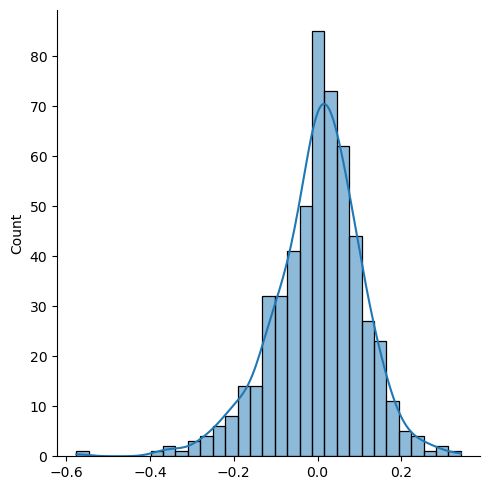

In [695]:
# Residual = the difference between the observed and predicted values
res_model6 = y_train - y_train_pred
sns.displot(res_model6, kde = True)
plt.show()

##### for Model#32

In [697]:
##Train set predicted values
y_train_pred1 = lr32_model.predict(X_train_rfe32_sm)
y_train_pred1

653    0.759860
668    0.615735
694    0.590792
212    0.582506
18     0.085559
         ...   
71     0.221008
106    0.362974
270    0.573811
435    0.562335
102    0.305956
Length: 547, dtype: float64

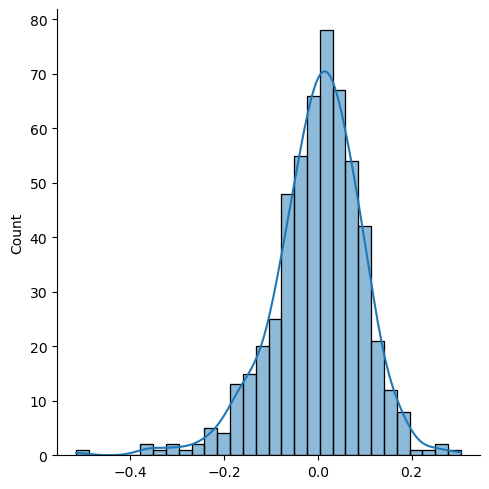

In [698]:
# Residual
res_model32 = y_train - y_train_pred1
sns.displot(res1, kde = True)
plt.show()

In [699]:
# Sum of residuals (should ideally be zero or very close to zero)
print(res_model6.sum())
print(res_model32.sum())

3.339550858072471e-13
2.8343993818680246e-13


In [700]:
# Mean Squared Error for both models
print(mean_squared_error(y_true = y_train, y_pred = y_train_pred))
print(mean_squared_error(y_true = y_train, y_pred = y_train_pred1))

0.011465147272429041
0.009055802084197116


#### <font color = 'Red'> Residual Comparision result:
- The sum of Residual errors is very close to zero for both models
- The sum of Residual errors is more close to zero for model#32
- The MSE is less for the model#32 as compared to model#6

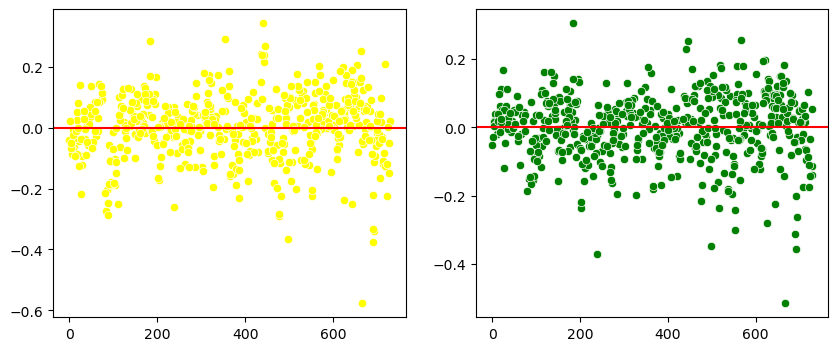

In [702]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.scatterplot(res_model6, color = 'yellow')
plt.axhline(y = 0, color = 'r', linestyle = '-') 

plt.subplot(1,2,2)
sns.scatterplot(res_model32, color = 'green')
plt.axhline(y = 0, color = 'r', linestyle = '-') 

plt.show()

#### Another assumption in Linear Regression: <font color = 'Red'> Error terms are independent of each other.
- The above two scatter plots verify that our error terms are independent for both models. We could homogenously fit line Y = 0 in both graphs.

#### Another assumption of Linear Regression : <font color = 'Red'> Homoscedasticity
- Error Terms should have constant 'Variance'
- Error is constant across the values of the dependent variable.
- Plot the residuals against the predicted values. The data is homoscedastic if the points are randomly scattered around zero or in a horizontal band. The data is heteroscedastic if the points form a pattern, like a funnel, curve, or cluster.

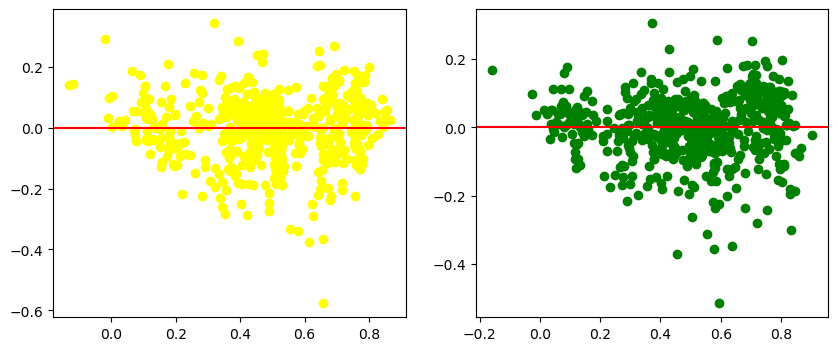

In [705]:
#Let us check out Homoscedasticity for our two models (residuals against predicted values)
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.scatter( y_train_pred, res_model6, color = 'yellow')
plt.axhline(y = 0, color = 'r', linestyle = '-') 

plt.subplot(1,2,2)
plt.scatter(y_train_pred1, res_model32,  color = 'green')
plt.axhline(y = 0, color = 'r', linestyle = '-') 

plt.show()


##### <font color = 'Magenta'> The points are randomly scattered around zero or in a horizontal band in the above two plots. Hence our data is Homoscedastic. 

#### Plotting the 'actual y' vs. 'precited y' for our train set

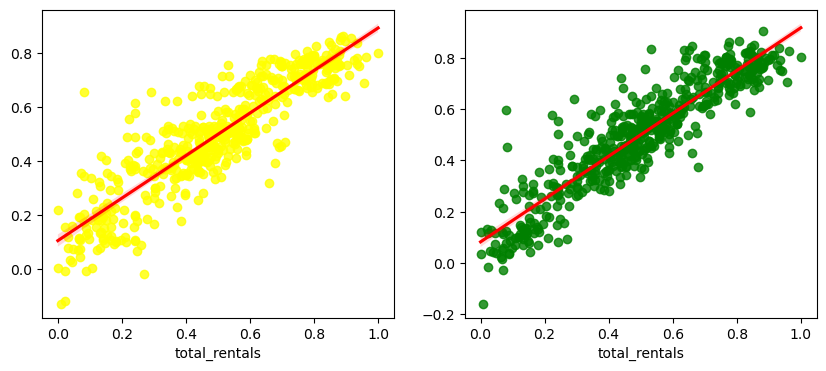

In [708]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.regplot(x = y_train, y = y_train_pred, color = 'yellow', line_kws=dict(color="r"))

plt.subplot(1,2,2)
sns.regplot(x = y_train, y = y_train_pred1, color = 'green', line_kws=dict(color="r"))

plt.show()

##### <font color = 'Magenta'> The 'actual y' vs. 'precited y' plot is consistent for both the models. It looks better for model#32.

### Making predictions or drawing inferences (from Test set)

##### <font color = 'Blue'> We Need to do the same transformation as we did for the training set (min-max) since learned coefficients correspond to scaled features. It won't give an error if we do not scale the test set but predictions will be useless
- Process is to:
-- fit() on the train set
-- transform() on the test set

In [712]:
df_test.head()

,year,workingday,temp,perceived_temp,windspeed,total_rentals,spring,summer,winter,Light Snow and Light Rain,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
468,1,0,20.295000,24.39980,12.791439,7460,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,27.367500,30.77750,14.333846,4788,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
302,0,0,13.085847,16.06645,11.833339,3331,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
355,0,1,17.356653,21.30605,3.167425,3068,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
515,1,1,27.880000,31.56645,13.083693,7338,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [713]:
numeric_vars = ['perceived_temp', 'temp', 'windspeed', 'total_rentals']

In [714]:
#scaler.transform would scale the values between 0 & 1 using MinMaxScaling
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

#To check if values are in the range [0,1]
df_test.head()

,year,workingday,temp,perceived_temp,windspeed,total_rentals,spring,summer,winter,Light Snow and Light Rain,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
468,1,0,0.543115,0.536771,0.422104,0.848606,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0.758058,0.704203,0.479765,0.526017,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
302,0,0,0.324018,0.317998,0.386287,0.350115,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
355,0,1,0.453814,0.455552,0.062325,0.318363,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
515,1,1,0.773634,0.724915,0.433030,0.833877,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [715]:
df_test.describe()

,year,workingday,temp,perceived_temp,windspeed,total_rentals,spring,summer,winter,Light Snow and Light Rain,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.448087,0.710383,0.522587,0.496471,0.445953,0.476973,0.300546,0.251366,0.207650,0.021858,...,0.114754,0.092896,0.071038,0.060109,0.065574,0.147541,0.076503,0.043716,0.065574,0.065574
std,0.498662,0.454829,0.231179,0.218059,0.216902,0.231726,0.459754,0.434989,0.406738,0.146621,...,0.319599,0.291083,0.257593,0.238341,0.248215,0.355617,0.266530,0.205023,0.248215,0.248215
min,0.000000,0.000000,0.047675,0.051010,0.062325,-0.049378,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.319255,0.311788,0.283505,0.278884,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.498465,0.490358,0.426778,0.477967,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.728577,0.688345,0.541285,0.644151,1.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.965734,0.939531,1.214955,0.980804,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### <font color = 'Red'> We see above that the 'min' value may not be 0 and the 'max' value may not be 1. This is because we have fit() the scaler on the train set. So, min and max values used to do (X - $X_{min}$)/($X_{max}$ - $X_{min}$) are from the training set

In [717]:
y_test = df_test.pop('total_rentals')
X_test = df_test

In [718]:
# for model#6
X_test_new_model6 = X_test[X_train_rfe6.columns]

#for model#32
X_test_new_model32 = X_test[X_train_rfe32.columns]

In [719]:
# for model#6
X_test_new_model6_sm = sm.add_constant(X_test_new_model6)

# for model#32
X_test_new_model32_sm = sm.add_constant(X_test_new_model32)

In [720]:
# for model#6
y_test_pred = lr6_model.predict(X_test_new_model6_sm)

# for model#32
y_test_pred1 = lr32_model.predict(X_test_new_model32_sm)

### y_test vs.y_test_pred

#### 1- For model#6

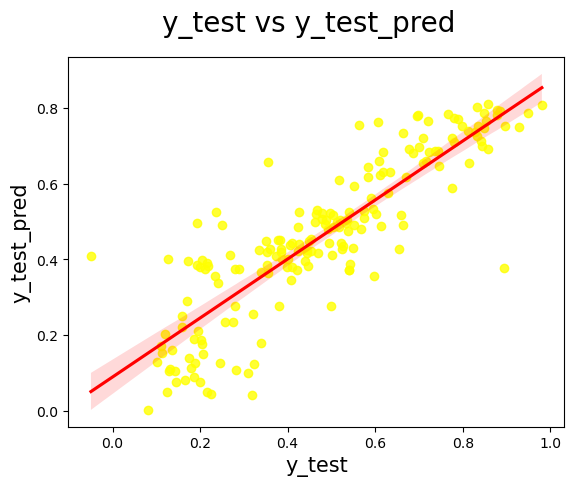

In [723]:
fig = plt.figure()
sns.regplot(x = y_test, y = y_test_pred, color = 'yellow', line_kws=dict(color="r"))
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize  = 15)
plt.ylabel('y_test_pred', fontsize  = 15)
plt.show()

#### For model#32

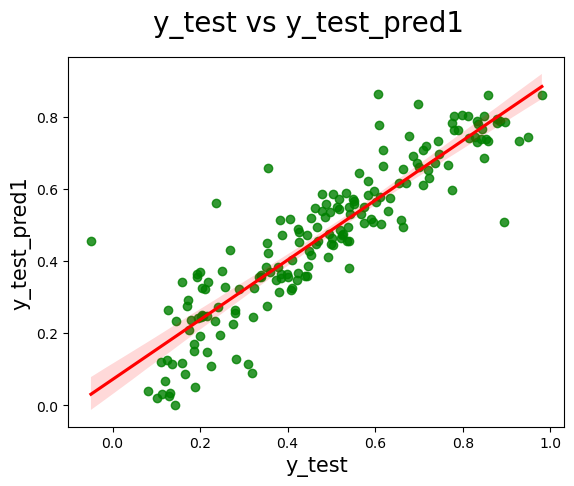

In [725]:
fig = plt.figure()
sns.regplot(x = y_test, y = y_test_pred1, color = 'green', line_kws=dict(color="r"))
fig.suptitle('y_test vs y_test_pred1', fontsize = 20)
plt.xlabel('y_test', fontsize  = 15)
plt.ylabel('y_test_pred1', fontsize  = 15)
plt.show()

### Now $R^2$ score for the Test Set

In [727]:
# For model#6
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7407973963869227

In [728]:
# For model#32
r2_score(y_true = y_test, y_pred = y_test_pred1)

0.8070080015221603

In [729]:
#Adjusted R^2
#adj r2  = 1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2_model6 = 1-(1-0.7407973963869227)*(183-1)/(183-10-1)
print(Adj_r2_model6)

Adj_r2_model32 = 1-(1-0.8070080015221603)*(183-1)/(183-13-1)
print(Adj_r2_model32)

0.7257274775722089
0.7921624631777111


#### <font color = 'Magenta'> $R^2$ and adj $R^2$ scores for model#32 is within 5% of the train set. For model#6, the scores are within 7% of the train set.

#### Though model#6 gives a satisfactory $R^2$ score (74%), model#32 gives a better $R^2$ score (80%) and the values are close to the train set. Also 'actual y' vs. 'predicted y' is better for model#32.
### <font color = 'Red'> Hence we will keep model#32 as our final model

### Summarising model#32

In [733]:
# Features coefficients
lr32_model.params

const                        0.150986
year                         0.245872
workingday                   0.051557
temp                         0.427956
spring                      -0.156233
winter                       0.093236
Light Snow and Light Rain   -0.289397
Mist and Few Clouds         -0.085023
Saturday                     0.056899
Dec                         -0.066871
Jul                         -0.049035
Mar                          0.052832
Nov                         -0.086414
Sep                          0.055970
dtype: float64

### Major Inferences:
#### 1- Assumptions of Linear Regression are satisfied.
#### 2- Summary:
- Temperature influences the Bike rentals the most. The higher the temperature, the more are the rentals. This means a unit change in temperature keeping other variables fixed would spur the demand for rental bikes by approx. 42.8%. This was the same inference we drew from EDA.
- The business concept is gaining popularity. Even if all other factors are taken away, still the business will grow by about 24.5% year by year keeping the other features fixed.
- Light Snow and Light Rain affect Bike rentals the most in a negative way. This means a unit change in Snow and Rain attributes keeping other variables fixed would discourage the demand for rental bikes by approx. 28.9%. (Same inference from EDA)
- During the spring season bike rentals are less (same inferences by EDA).

#### <font color = 'Magenta'> The Bike rental company should focus on the above points to stay in the competition and accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.